In [161]:
import pandas as pd

#### Step 1: Data Ingestion. We need to read the data from the source folder. 

In [162]:
data_set=pd.read_csv('data/gemstone.csv')

In [163]:
data_set.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


#### Step 2: The process of checking a missing values. 

In [164]:
data_set.isnull().sum() 

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [165]:
#Observations: No missing value has been found. 

#### Step 3: Checking the variables type of the features. 

In [166]:
data_set.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [167]:
# Id column is not required for which we will take the step of dropping "id" columns.

#### Step 4:Dropping a column - Feature Engineering

In [168]:
data_set=data_set.drop(labels=["id"],axis=1) # This is the step to drop a entire column which is irrelevent for EDA. 

In [169]:
data_set.head(5) # It can be seen that id column has been removed. 

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


#### Step5: Check for Duplicate records

In [170]:
data_set.duplicated().sum() # No Duplicate record found. 

0

In [171]:
data_set.drop_duplicates # This is the process of removing the duplicate if there exist. 

<bound method DataFrame.drop_duplicates of         carat        cut color clarity  depth  table     x     y     z  price
0        1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1        2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2        0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3        0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4        1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453
...       ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39  2.67   1130
193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77  3.47   2874
193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75  3.62   3036
193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49  2.81    681
193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71  3.48   2258

[193573 rows x 10 co

#### Step 6: Segregating numerical and categorical features.

In [172]:
numerical_columns=data_set.columns[data_set.dtypes != 'object']
categorical_columns=data_set.columns[data_set.dtypes=='object']
print(f"The numerical Columns are :{numerical_columns}")
print(f"The categorical Columns are :{categorical_columns}")


The numerical Columns are :Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
The categorical Columns are :Index(['cut', 'color', 'clarity'], dtype='object')


In [173]:
# Describe function can be used for categorical as well as numerical data set. 

In [174]:
data_set[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [175]:
data_set[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [176]:
data_set['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

#Things to remember - Function unique() , nunique() , value_counts() 

In [177]:
data_set['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

#### Graphical plotting using Seaborn and matplotlib 

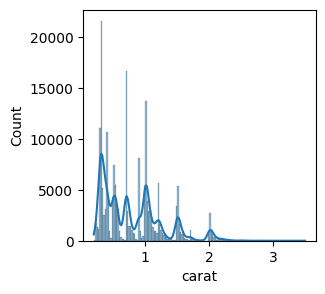

<Figure size 300x300 with 0 Axes>

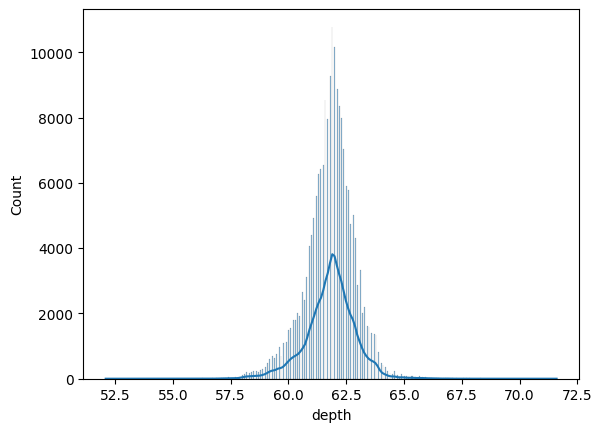

<Figure size 300x300 with 0 Axes>

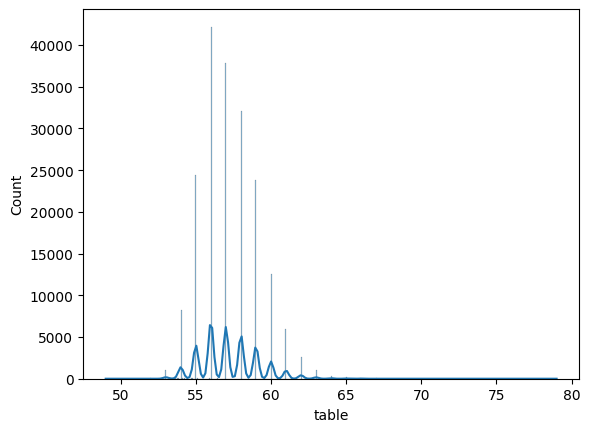

<Figure size 300x300 with 0 Axes>

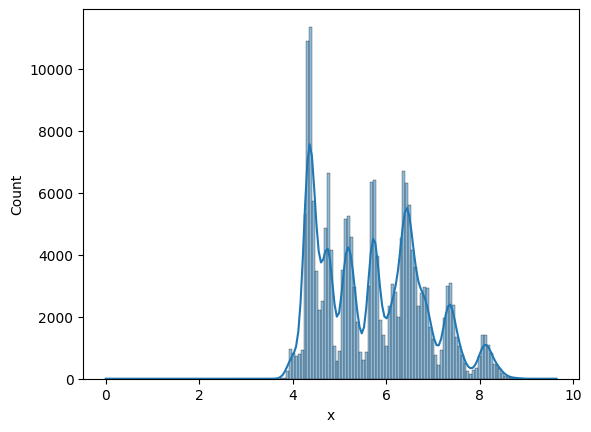

<Figure size 300x300 with 0 Axes>

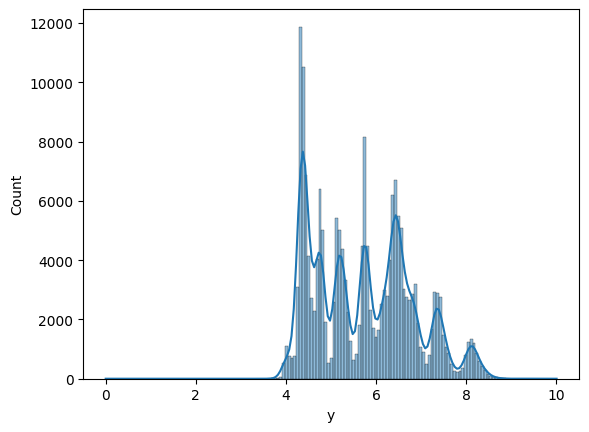

<Figure size 300x300 with 0 Axes>

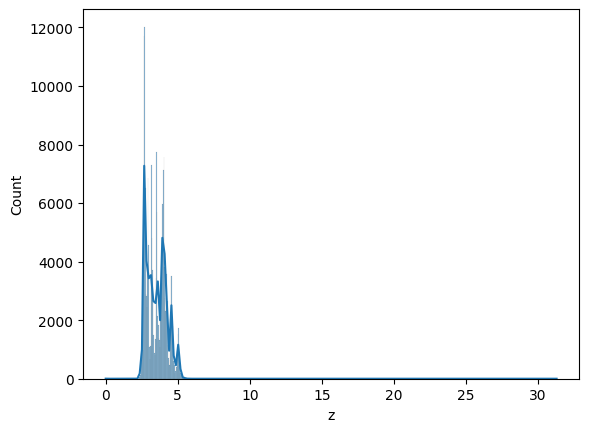

<Figure size 300x300 with 0 Axes>

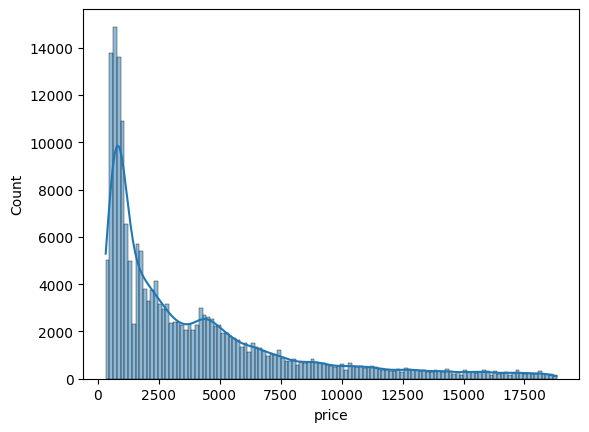

<Figure size 300x300 with 0 Axes>

In [178]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
x=1
for i in numerical_columns:
    sns.histplot(data=data_set,x=i,kde=True)
    print('\n')
    plt.figure(figsize=(3,3))
    plt.show()

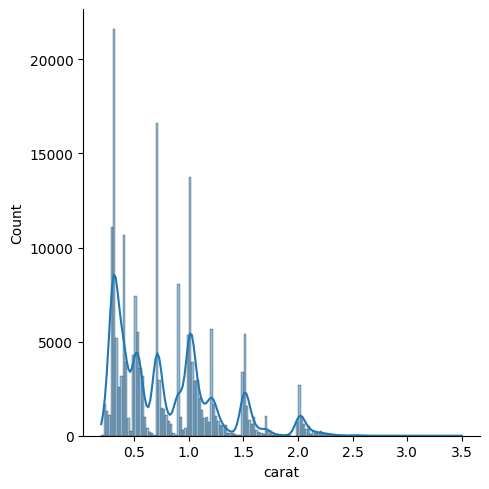

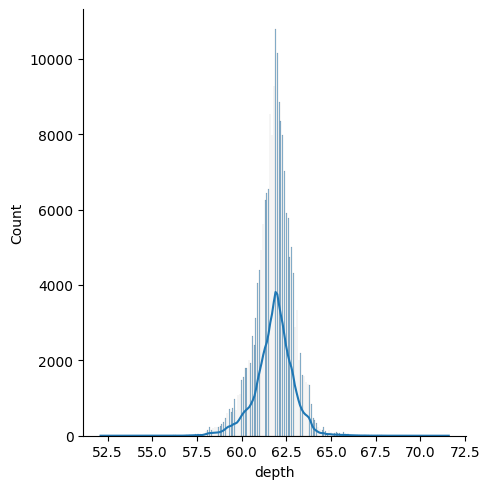

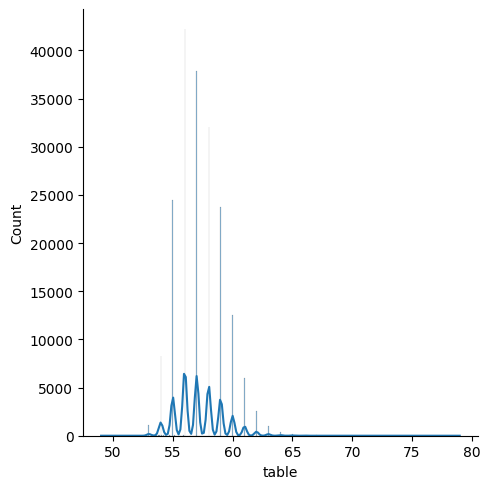

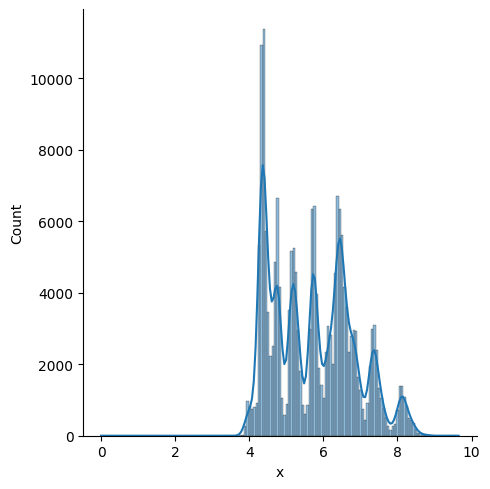

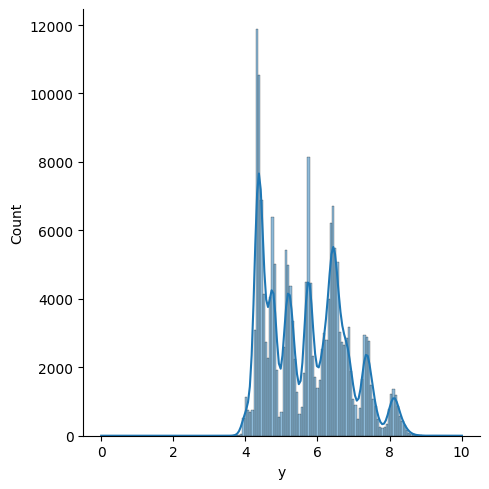

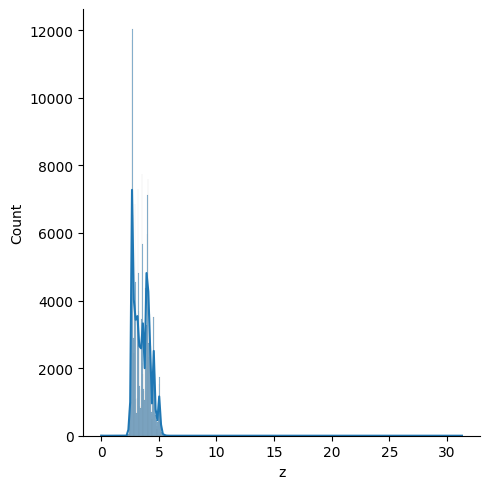

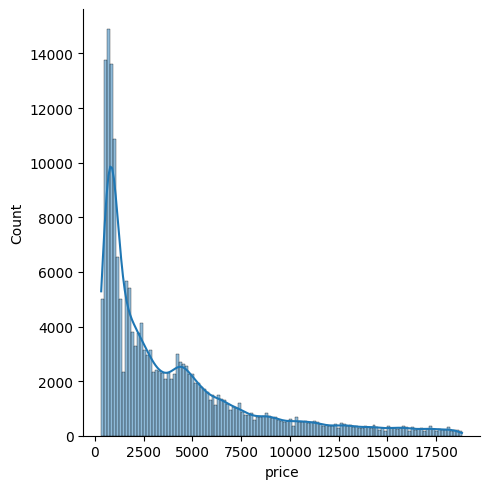

In [179]:
for i in numerical_columns:
    sns.displot(data=data_set,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: xlabel='cut', ylabel='price'>

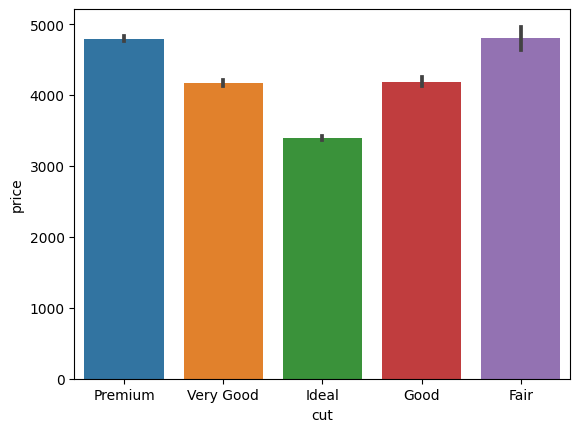

In [180]:
sns.barplot(data=data_set,x='cut',y='price') # when x and y is given. 

<Axes: xlabel='color', ylabel='count'>

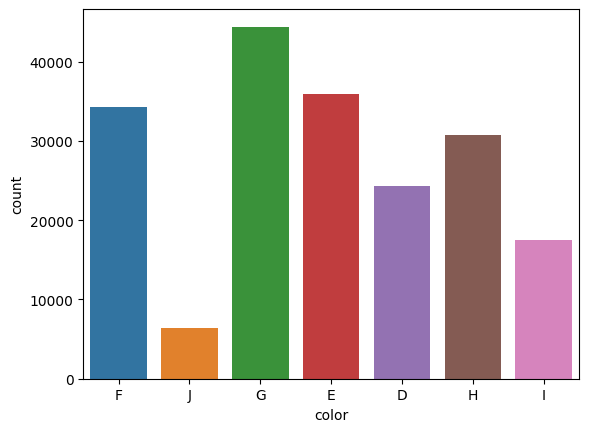

In [181]:
sns.countplot(x=data_set["color"]) # count plot. 

#### Correlation - Heatmap

In [182]:
sns.heatmap(data_set.corr())
plt.show()

ValueError: could not convert string to float: 'Premium'

In [ ]:
sns.heatmap(data_set.corr(numeric_only=True,),annot=True) # This gives the exact number of correlation. 

###### Observation: It can be seen the x y z can be droped as they are highly multicollineary.
#The correlation between carat and x,y,z are high and x,y,z correaltion is also high. 
#### Thus,we might lose reliability in determining the effects of individual independent features on the dependent feature in your mode

In [ ]:
#data_set=data_set.drop(labels=['x','y','z'],axis=1)

In [184]:
data_set.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [ ]:
sns.pairplot(data_set)

In [ ]:
data_set['clarity'].unique()

Now its time to known the Domain Knowledge of Price relation with Diamond Cut,Clarity,Color which are categorical features. 

Ranks has to be given and categorical data set needs to converted into dictory so that machine learning model can understand. 

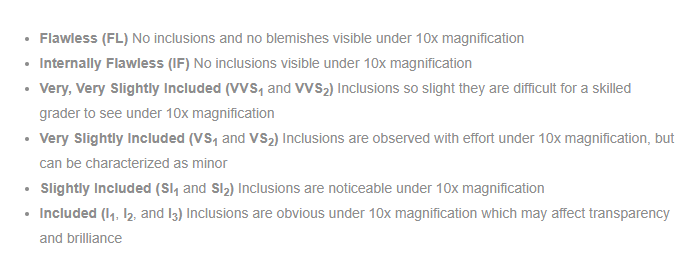

### Based on Color and Clarity.


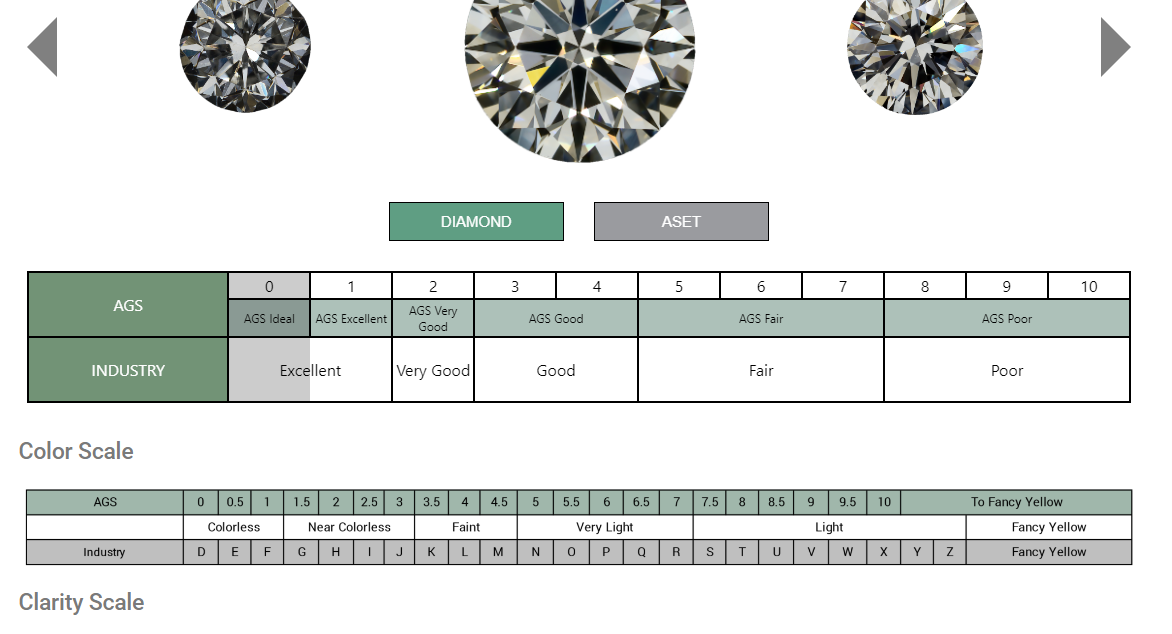


In [ ]:
data_set['clarity'].unique()

In [ ]:
data_set['color'].unique()

In [ ]:
data_set['cut'].unique()

In [185]:
# Now its come to assign rank to each of the the categorical feature. All these has been mapped with the values. 
cut_ranking = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}
color_ranking = {
    'D': 1,
    'E': 2,
    'F': 3,
    'G': 4,
    'H': 5,
    'I': 6,
    'J': 7
}
clarity_ranking = {
    'IF': 8,
    'VVS1': 7,
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1
}


# After the mapping has been complete its time to replace the value with the mapped or ranked values in the data set. 

In [186]:
data_set['cut']=data_set['cut'].map(cut_ranking)

In [187]:
data_set['clarity']=data_set['clarity'].map(clarity_ranking)

In [188]:
data_set['color']=data_set['color'].map(color_ranking)

In [189]:
data_set

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681


# Now we can see that categorical features has been convered through maps providing ranks which ML model can understand for model building purpose. 